In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

root = '/Users/markusfasching/EPFL/Work/project-SOAP/scripts/SOAP-time-code/results/icewaterinterfacemeltfast_lf/v0/SOAP/533/ICENEW/PCAfull/interval_250/lag_0/sigma_0/ridge_a1e-05'
#root = '/Users/markusfasching/EPFL/Work/project-SOAP/scripts/SOAP-time-code/results/icewaterinterfacemeltfast_lf/v0/SOAP/533/ICE_RIDGE/TempPCA_nonorm/interval_1/lag_0/sigma_0/ridge_a1e-05'
eigvals = torch.load(os.path.join(root,'SOAP_533_[8]_center8_eigvals.pt')).numpy()
eigvecs = torch.load(os.path.join(root,'SOAP_533_[8]_center8_eigvecs.pt')).numpy()
EVR = torch.load(os.path.join(root,'SOAP_533_[8]_center8EVR.pt')).numpy()
EVR_ridge = torch.load(os.path.join(root,'SOAP_533_[8]_center8EVR_ridge.pt')).numpy()
l_max = 8
n_max = 8
neighbors = [1, 8]
labels = [f'{ntype1}{ntype2}{l}{ n1}{n2}' for ntype1 in neighbors for ntype2 in neighbors if ntype2 >=ntype1 for l in range(l_max + 1) for n1 in range(n_max+1) for n2 in range(n_max+1)]
print(len(labels))#properties = torch.load('SOAP_533_[8]_center8_properties.pt')
print(labels)
#cov = torch.load('SOAP_533_[8]_center8_cov1.pt')
N_CUM = 1

729
['88000', '88001', '88002', '88003', '88004', '88005', '88006', '88007', '88008', '88010', '88011', '88012', '88013', '88014', '88015', '88016', '88017', '88018', '88020', '88021', '88022', '88023', '88024', '88025', '88026', '88027', '88028', '88030', '88031', '88032', '88033', '88034', '88035', '88036', '88037', '88038', '88040', '88041', '88042', '88043', '88044', '88045', '88046', '88047', '88048', '88050', '88051', '88052', '88053', '88054', '88055', '88056', '88057', '88058', '88060', '88061', '88062', '88063', '88064', '88065', '88066', '88067', '88068', '88070', '88071', '88072', '88073', '88074', '88075', '88076', '88077', '88078', '88080', '88081', '88082', '88083', '88084', '88085', '88086', '88087', '88088', '88100', '88101', '88102', '88103', '88104', '88105', '88106', '88107', '88108', '88110', '88111', '88112', '88113', '88114', '88115', '88116', '88117', '88118', '88120', '88121', '88122', '88123', '88124', '88125', '88126', '88127', '88128', '88130', '88131', '8813

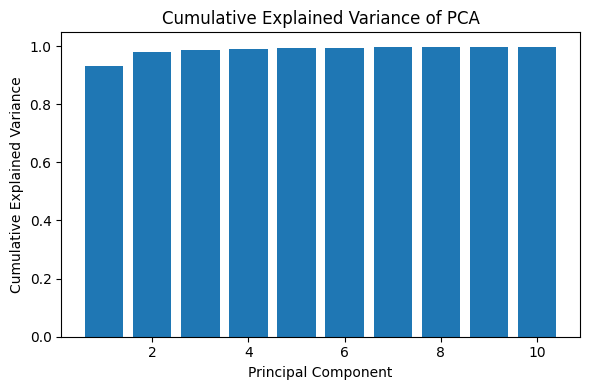

In [31]:
# Normalize eigenvalues → explained variance ratio
explained_var = eigvals / np.sum(eigvals)

# Cumulative explained variance
cumulative_var = np.cumsum(explained_var)

# How many PCs to plot
nplot = min(10, len(eigvals))   # first 10 or fewer

plt.figure(figsize=(6,4))
plt.bar(range(1, nplot+1), cumulative_var[:nplot])
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance of PCA")
plt.tight_layout()
plt.show()

0


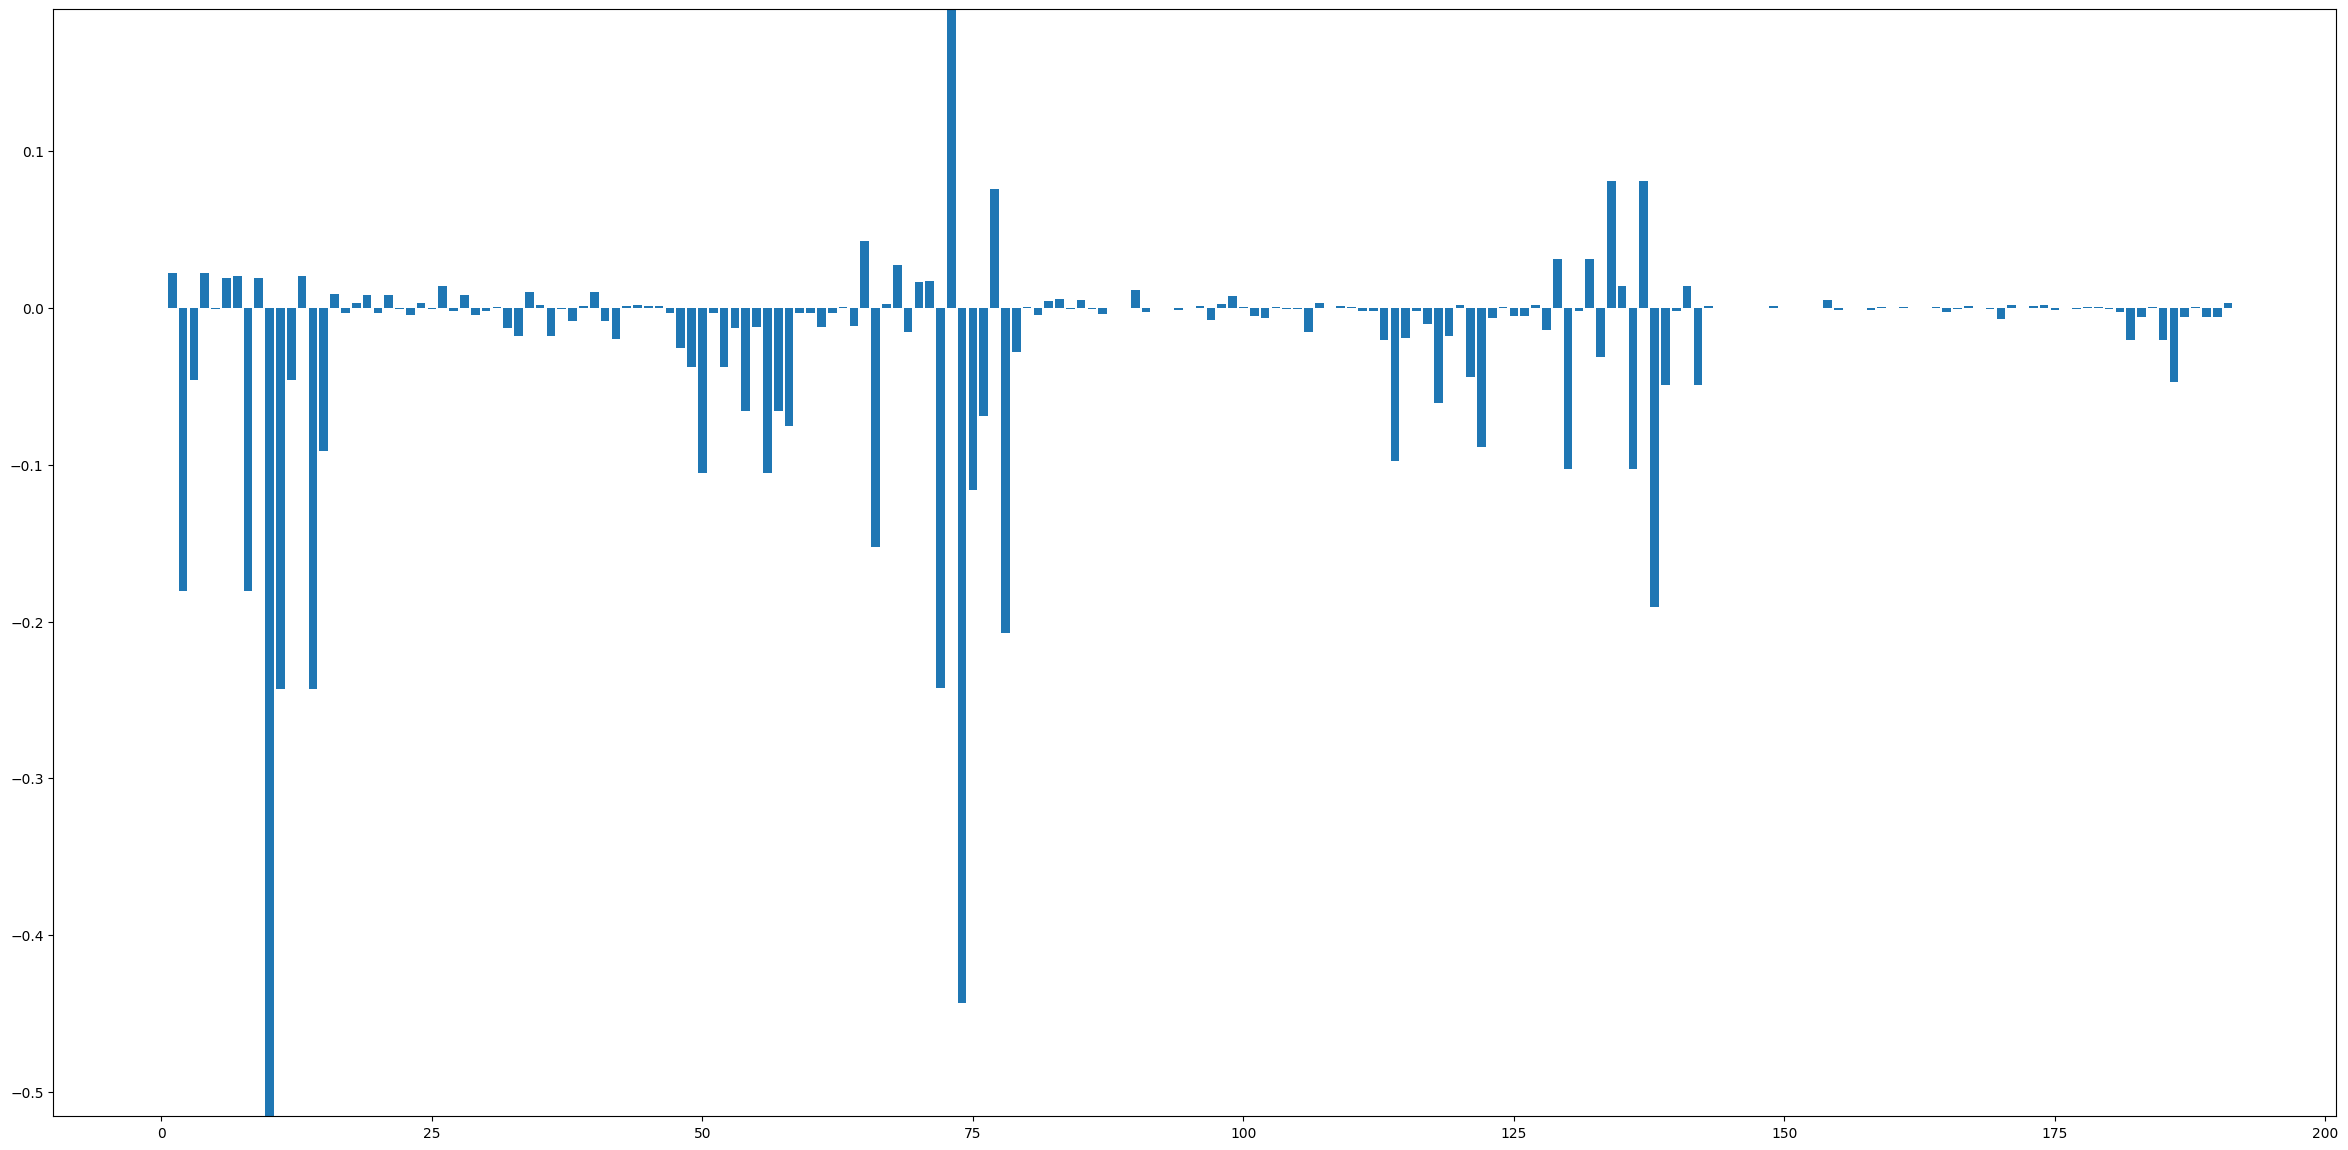

In [33]:
fig, axs = plt.subplots(N_CUM,1,figsize=(24,12))
cumulant_weights = eigvecs[:,0].reshape(-1,N_CUM)
#cumulant_weights_t = eigvecs[:,0].reshape(N_CUM, -1)
ymin =  cumulant_weights.min()
ymax = cumulant_weights.max()
positions = np.arange(0,cumulant_weights.shape[0])
#positions = np.arange(0,cumulant_weights_t.shape[1])
if N_CUM == 1:
    axs = [axs]

for i, cum in enumerate(cumulant_weights.T):
    print(i)
    axs[i].bar(range(len(cum)), cum)
    axs[i].set_ylim(ymin, ymax)
    #axs[i].set_ylim(cum.min(), cum.max())
plt.tight_layout(pad=2.5)   # increase pad (default ≈1.08)
plt.show()

In [34]:
def top5_rows(matrix):
    """
    Returns the row indices of the 5 largest elements in a 2D array.
    """
    # Flatten the matrix
    flat_idx = np.argpartition(matrix.flatten(), -5)[-5:]
    
    # Convert flattened indices back to 2D indices
    rows, cols = np.unravel_index(flat_idx, matrix.shape)
    
    # Return row indices as a list
    return list(rows)


idx = top5_rows(cumulant_weights)
print(idx)
print([labels[i] for i in idx])

[np.int64(65), np.int64(77), np.int64(134), np.int64(73), np.int64(137)]
['18001', '18031', '88012', '18021', '88021']


In [35]:

print(labels[181])

88311


array([0.0638654 , 0.01037208, 0.00527379, 0.00199135])

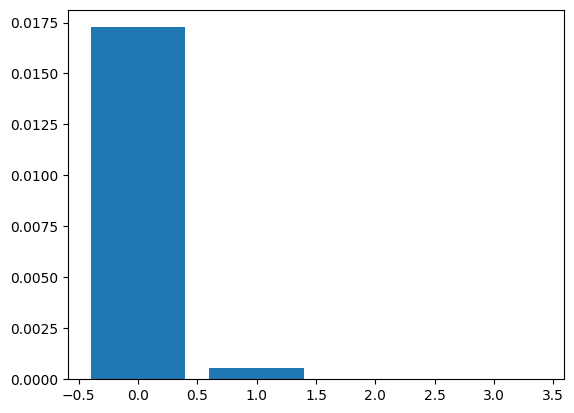

In [39]:
plt.bar(range(len(EVR_ridge)), EVR_ridge)
EVR

In [ ]:
plt.bar(range(len(EVR_ridge)), EVR_ridge)

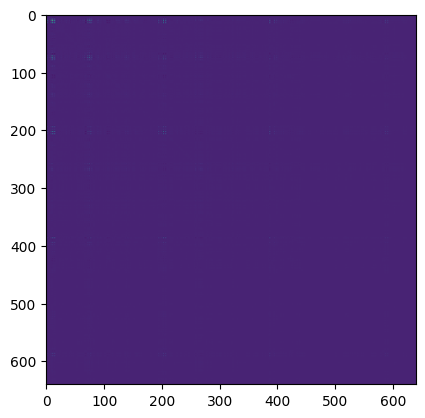

In [18]:
cov = torch.load('SOAP_533_[6]_center6_cov1.pt')
plt.imshow(cov)